## Exploración Anual de Ventas, Productos y Consumidores y Predicción de Envíos con Machine Learning

In [3]:
pip install kaggle


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

Nos descargamos el Dataset a tarvés de la API de kaggle:

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Autenticación
api = KaggleApi()
api.authenticate()

# Descargar el dataset
api.dataset_download_files('rohitsahoo/sales-forecasting', path='.', unzip=True)



Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting


In [ ]:
dataset_path = 'train.csv'  
sales = pd.read_csv(dataset_path)

## Data Collection & Understanding:
Comprensión y checkeo de información

In [6]:
print(sales.info())
sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


Estadísticas descriptivas:

In [7]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Filas y columnas:

In [8]:
sales.shape

(9800, 18)

Duplicados:

In [9]:
sales[sales.duplicated()].shape[0]

0

Valores únicos:

In [10]:
sales.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [11]:
Paises = sales['Country'].unique()
Estado = sales['State'].unique()
Categoria = sales['Category'].unique()
Subcategoria = sales['Sub-Category'].unique()
Envio = sales['Ship Mode'].unique()
Segmento = sales['Segment'].unique()
Region = sales['Region'].unique()

print(Paises)
print(Estado)
print(Categoria)
print(Subcategoria)
print(Envio)
print(Segmento)
print(Region)

['United States']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']


In [12]:
#Comprobamos que Customer ID y Customer Name se corresponden:
errores = sales.groupby('Customer ID')['Customer Name'].nunique()

errores = errores[errores > 1]

if errores.empty:
    print("Todos los Customer ID tienen un único Customer Name.")
else:
    print("Errores encontrados:")
    print(errores)

Todos los Customer ID tienen un único Customer Name.


Valores nulos:

In [13]:
sales.isnull().sum()  

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Data Management:
Gestión de Datos

Tratamos los valores nulos:

In [14]:
PostalCodeNulos=sales.query('`Postal Code`.isna()')

PostalCodeNulos.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Encontramos cual es el CP de Burlington, pero vamos a comprobar antes que en la tabla no exista ya algún registro con esa ciudad, donde si que esté puesto el CP:

In [15]:
burlington_data = sales.query('City == "Burlington" and State == "Vermont"')
burlington_data

#NOTA: nos dimos cuenta que teníamos que filtrar también por State porque había más de un Burlington

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


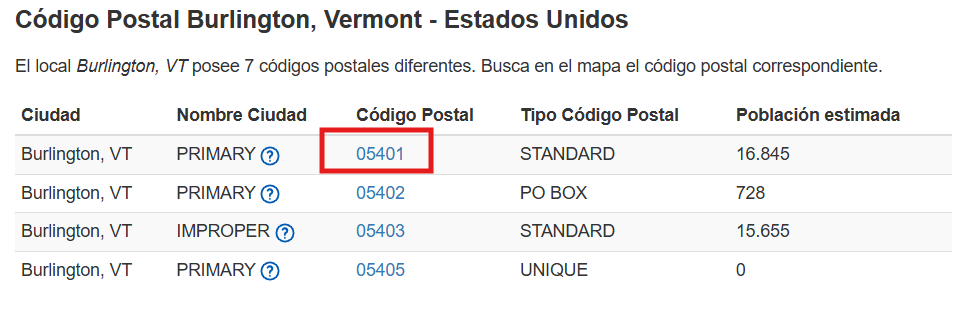

Cambiamos los nulos por el CP real de esa ciudad y convertimos la columna a Str:

In [16]:

sales['Postal Code'] = sales['Postal Code'].astype(str).fillna('05401')

print(sales.info())
sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


Cambiamos el formato de las fechas de Ship Date y Order Date y agregamos dos columnas, una con el mes y otra con el año(basadas en Order Date):

In [17]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format="%d/%m/%Y")
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format="%d/%m/%Y")

sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month_name()

In [18]:
sales.describe()

,Row ID,Order Date,Ship Date,Sales,Year
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059,2016.724184
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000,2015.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000,2016.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000,2017.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000,2018.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000,2018.000000
std,2829.160653,NaN,NaN,626.651875,1.123984


Vemos que tenemos los datos de enero 2015 a diciembre del 2018, 4 años en total.

In [19]:
print(sales.info())
sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2015,June
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,2015,June
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,June
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,2015,June
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,2015,June


## Exploratory Data Analysis (EDA):
Análisis Exploratorio de Datos

In [21]:
VentasPorCustomer=sales.groupby('Customer Name')['Order ID'].count()
print(VentasPorCustomer)

max_pedidos = VentasPorCustomer.max()

cliente_max_pedidos = VentasPorCustomer.idxmax()
print(f"El cliente con más pedidos es {cliente_max_pedidos}, con un total de {max_pedidos} pedidos.")


Customer Name
Aaron Bergman          6
Aaron Hawkins         11
Aaron Smayling        10
Adam Bellavance       18
Adam Hart             20
                      ..
Xylona Preis          28
Yana Sorensen         12
Yoseph Carroll         8
Zuschuss Carroll      31
Zuschuss Donatelli     9
Name: Order ID, Length: 793, dtype: int64
El cliente con más pedidos es William Brown, con un total de 35 pedidos.


In [22]:
#Cuantas veces aparece cada cliente:
ConteoPorCliente = sales['Customer Name'].value_counts()
print(ConteoPorCliente)


Customer Name
William Brown       35
Paul Prost          34
Matt Abelman        34
John Lee            33
Jonathan Doherty    32
                    ..
Lela Donovan         1
Jocasta Rupert       1
Carl Jackson         1
Sung Chung           1
Ricardo Emerson      1
Name: count, Length: 793, dtype: int64


## Comprobación de valores atípicos:

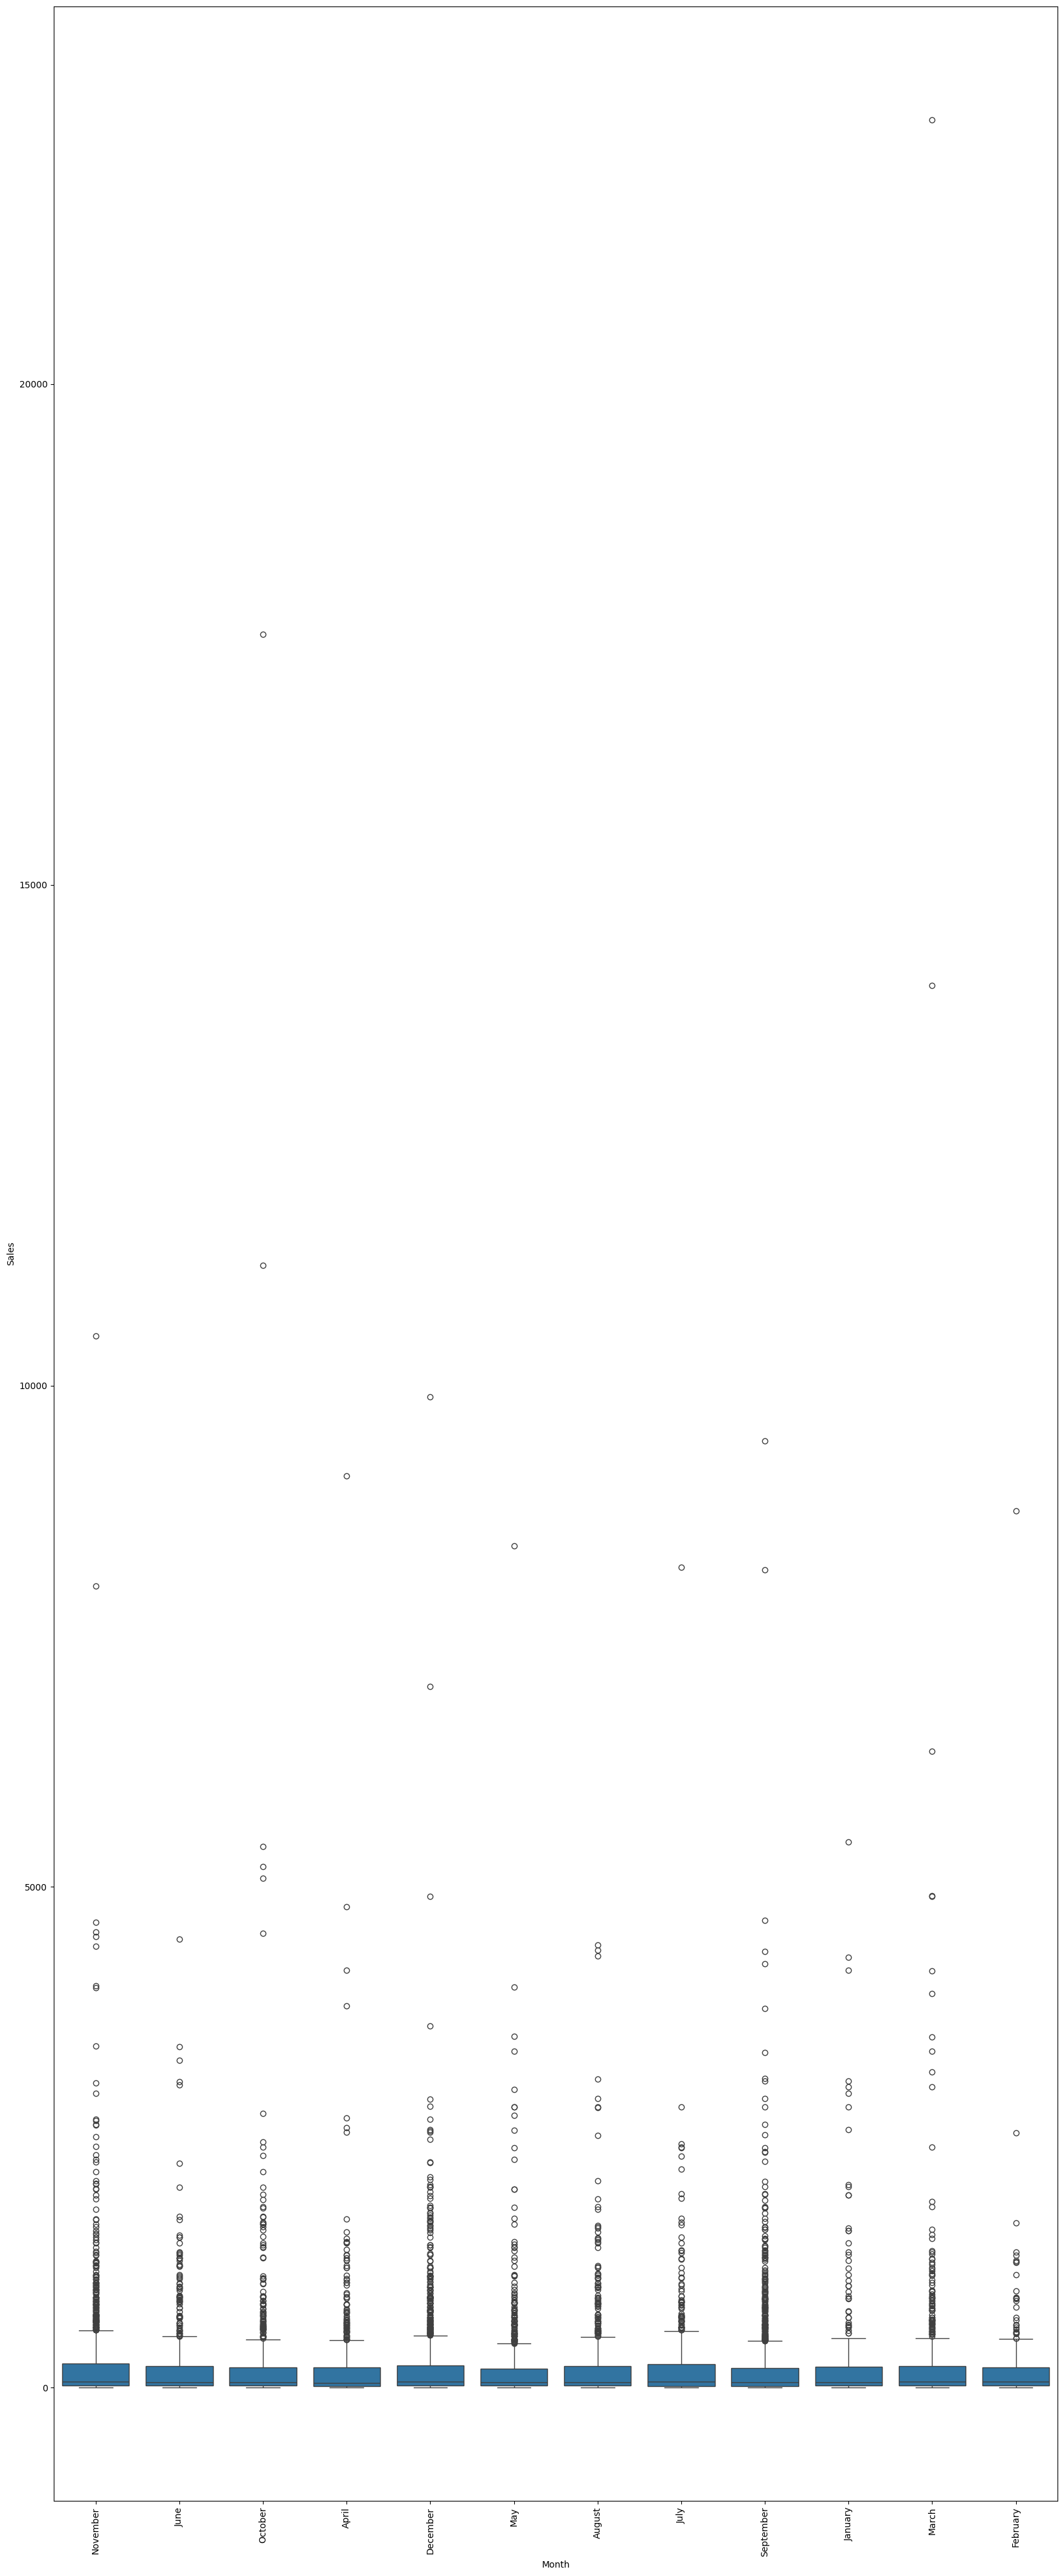

In [23]:
#Comprobamos si hay outliers
plt.figure(figsize=(20,50))
sns.boxplot(data= sales, x='Month', y = 'Sales')
plt.xticks(rotation= 90);

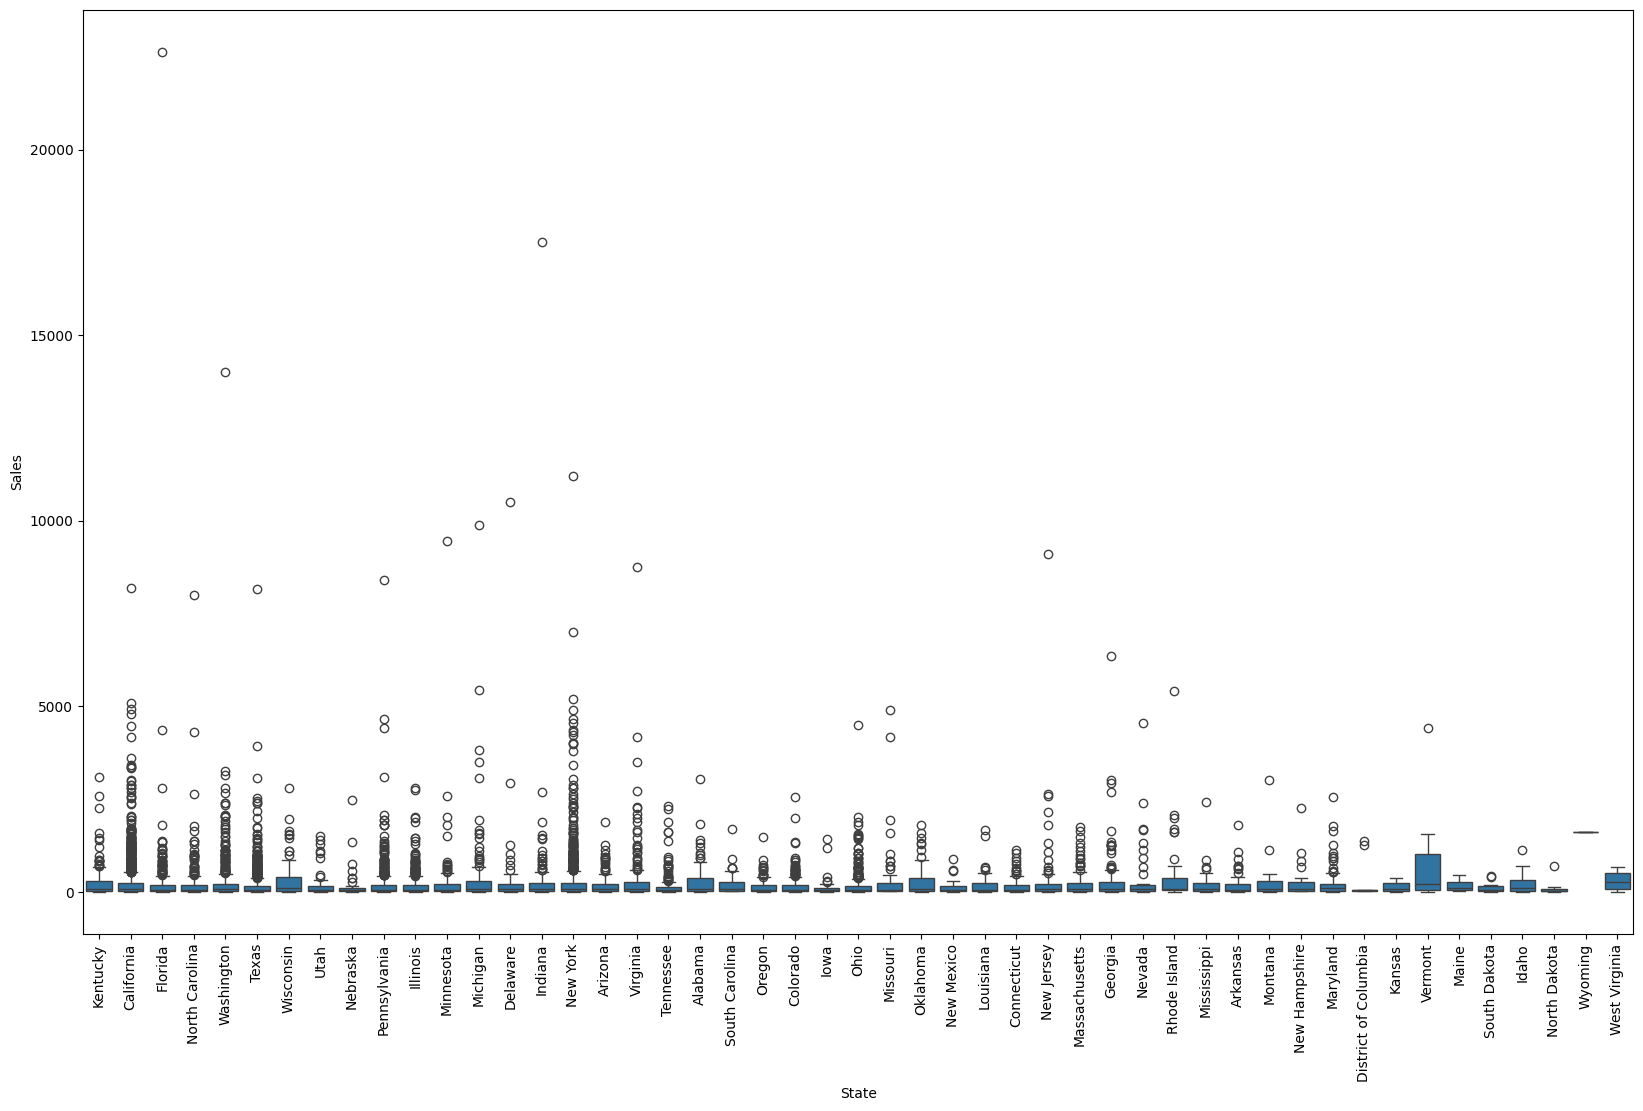

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(data= sales, x='State', y = 'Sales')
plt.xticks(rotation= 90);

In [25]:
sales.describe()

,Row ID,Order Date,Ship Date,Sales,Year
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059,2016.724184
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000,2015.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000,2016.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000,2017.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000,2018.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000,2018.000000
std,2829.160653,NaN,NaN,626.651875,1.123984


Si nos fijamos en la columna de 'Sales', vemos que la mediana es bastante baja(54.49$), lo que da a entender que la mayor parte de las ventas se concentran en los valores menores, pero en cambio el promedio es más alto(230.79$). Nos da a entener que hay valores realmente altos tal y como vemos con el máximo(22.638$) que hacen que ese promedio suba.

Comprobamos si está influyendo el Segmento del cliente:

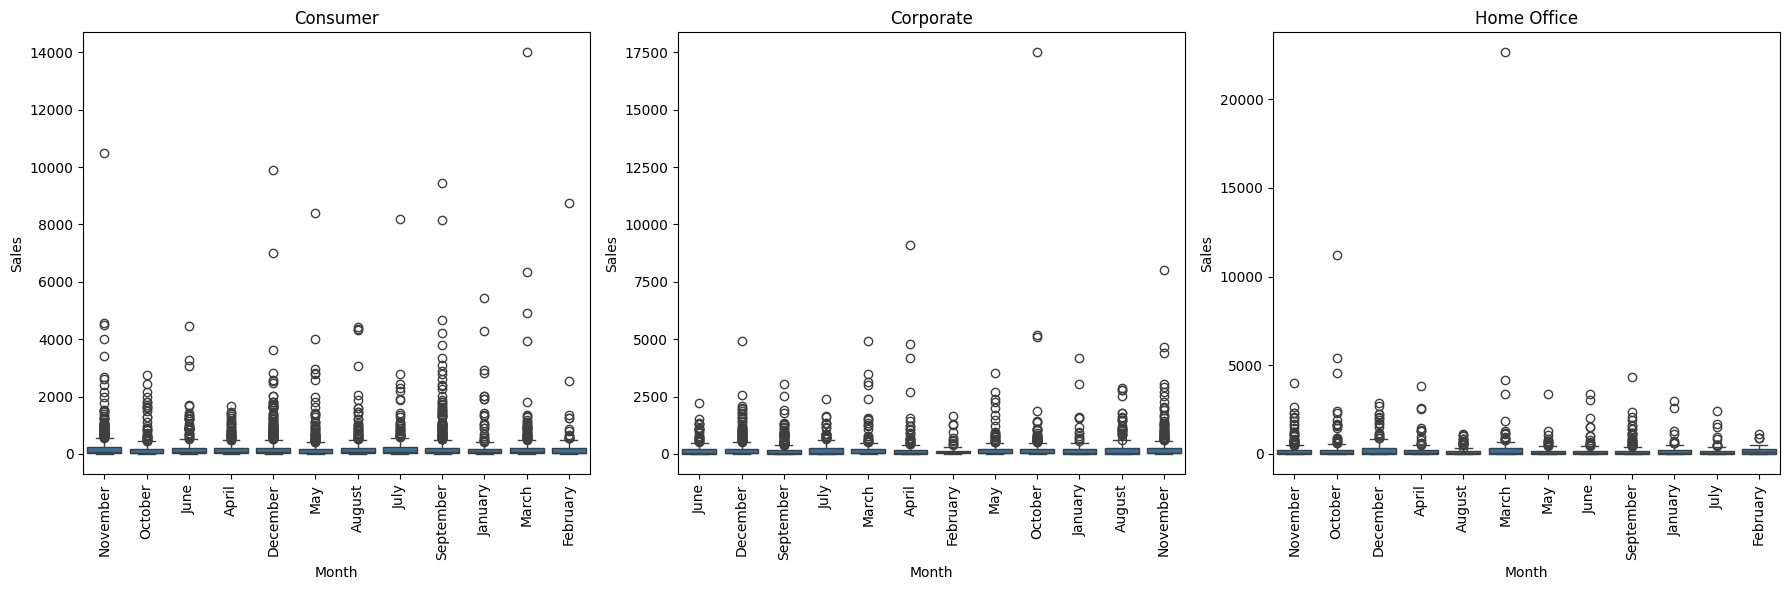

In [26]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))  

consumer_data = sales[sales['Segment'] == 'Consumer']
corporate_data = sales[sales['Segment'] == 'Corporate']
home_office_data = sales[sales['Segment'] == 'Home Office']

sns.boxplot(ax=axes[0],data=consumer_data, x='Month', y='Sales')
axes[0].set_title('Consumer')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1],data=corporate_data, x='Month', y='Sales')
axes[1].set_title('Corporate')
axes[1].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[2], data=home_office_data, x='Month', y='Sales')
axes[2].set_title('Home Office')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout();


Vemos que siguen habiendo Outliers, no tiene nada que ver con la segmentación de clientes. La hipótesis no es válida

Comprobamos si tiene que ver son las categorías de producto:

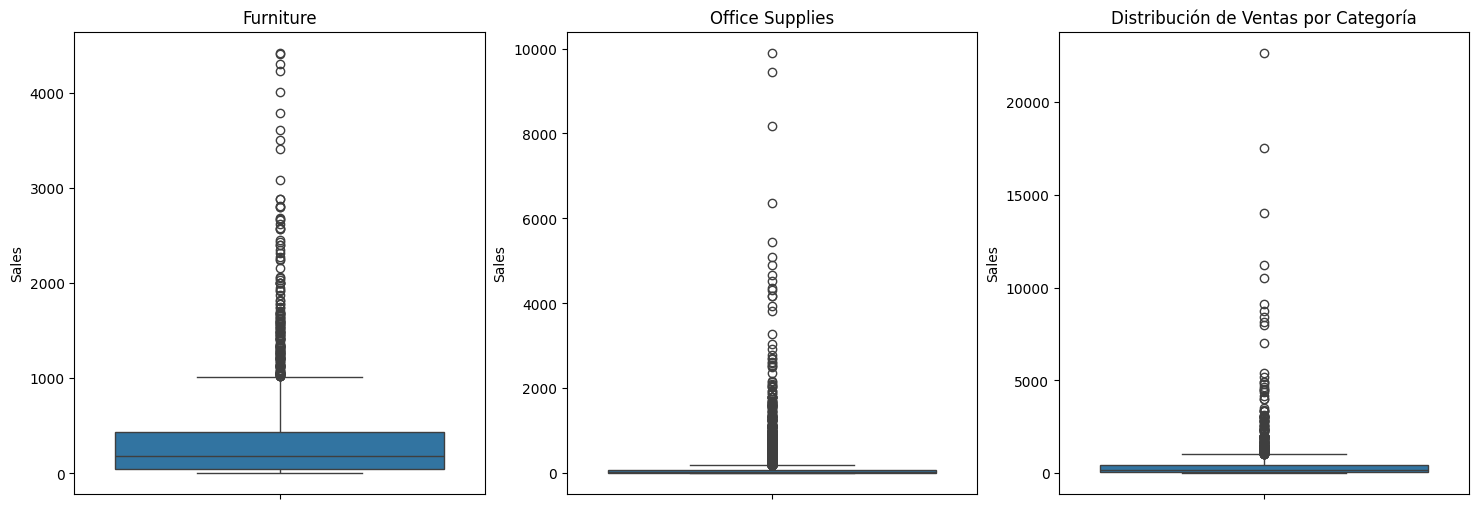

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))  

furniture_data = sales[sales['Category'] == 'Furniture']
office_supplies_data = sales[sales['Category'] == 'Office Supplies']
technology_data = sales[sales['Category'] == 'Technology']

sns.boxplot(ax=axes[0],data=furniture_data, y='Sales')
axes[0].set_title('Furniture')
axes[0].tick_params(axis='x')

sns.boxplot(ax=axes[1],data=office_supplies_data, y='Sales')
axes[1].set_title('Office Supplies')
axes[1].tick_params(axis='x')

sns.boxplot(ax=axes[2], data=technology_data, y='Sales')
axes[2].set_title('Technology')
axes[2].tick_params(axis='x')

plt.title('Distribución de Ventas por Categoría');


Tampoco tiene que ver con la categoría de producto.

## Tratamiento de los valores atípicos:

Decidimos tratar los outliers con el método Intercuartil, porque es lo que mejor puede capturar esos datos tan sesgados:

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
7          8  CA-2015-115812 2015-06-09 2015-06-14  Standard Class   
10        11  CA-2015-115812 2015-06-09 2015-06-14  Standard Class   
11        12  CA-2015-115812 2015-06-09 2015-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9759    9760  CA-2017-146913 2017-10-31 2017-11-05  Standard Class   
9774    9775  CA-2015-169019 2015-07-26 2015-07-30  Standard Class   
9781    9782  CA-2017-153178 2017-09-14 2017-09-18  Standard Class   
9787    9788  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   
9788    9789  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   

     Customer ID    Customer Name    Segment        Country             City  \
1       CG-12520      Claire Gute   Consumer  United States        Henderson   

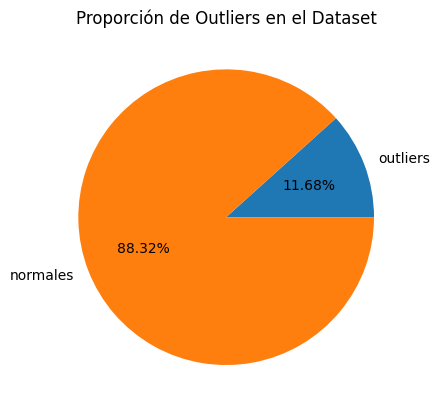

In [29]:

Q1 = sales['Sales'].quantile(0.25)
Q3 = sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

valor_más_bajo = Q1 - 1.5 * IQR
valor_más_alto = Q3 + 1.5 * IQR

outliers = sales[(sales['Sales'] < valor_más_bajo) | (sales['Sales'] > valor_más_alto)]

filas_outliers = outliers.shape[0]

plt.pie([outliers.shape[0], sales.shape[0]-outliers.shape[0]],
        labels =["outliers", "normales"],
        autopct='%1.2f%%')
plt.title('Proporción de Outliers en el Dataset');

print(outliers)

Tenemos 1145 outliers, un 11,68% de la muestra.

De momento, seguimos haciendo comprobaciones para decidir que hacemos con ellos.

### Separamos los Outliers en otro dataframe para hacer una exploración para ver si encontramos algún patrón en ellos:

count     1145.000000
mean      1270.546212
std       1427.896223
min        501.810000
25%        636.860000
50%        871.400000
75%       1348.704000
max      22638.480000
Name: Sales, dtype: float64


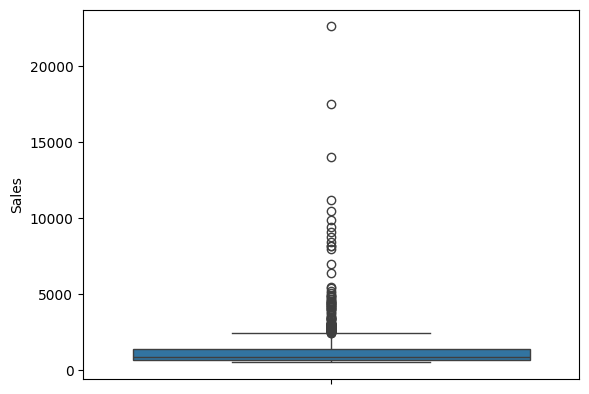

In [30]:
sales_outliers =  sales[sales['Sales'] > 500.64]

print(sales_outliers['Sales'].describe())

sns.boxplot(data = sales_outliers, y = 'Sales');

Dentro de los outliers sigue habiendo outliers, lo que nos indica que los datos de ese grupo siguen estando sesgados.

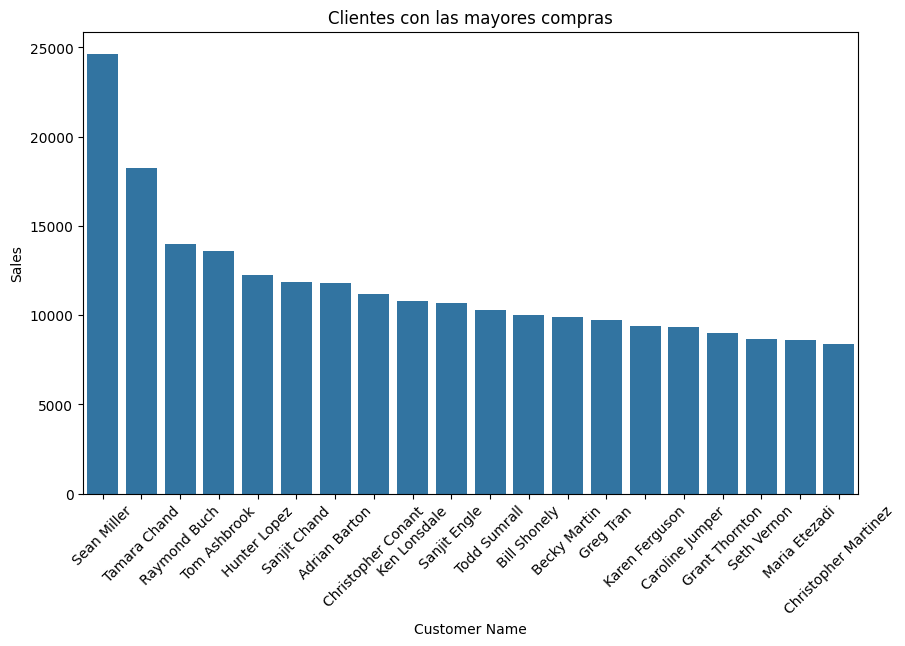

In [31]:
plt.figure(figsize=(10,6))
top_10_customers = sales_outliers.groupby('Customer Name')['Sales'].sum().nlargest(20).reset_index()

sns.barplot(data=top_10_customers, x='Customer Name', y='Sales')
plt.title('Clientes con las mayores compras');
plt.xticks(rotation=45);

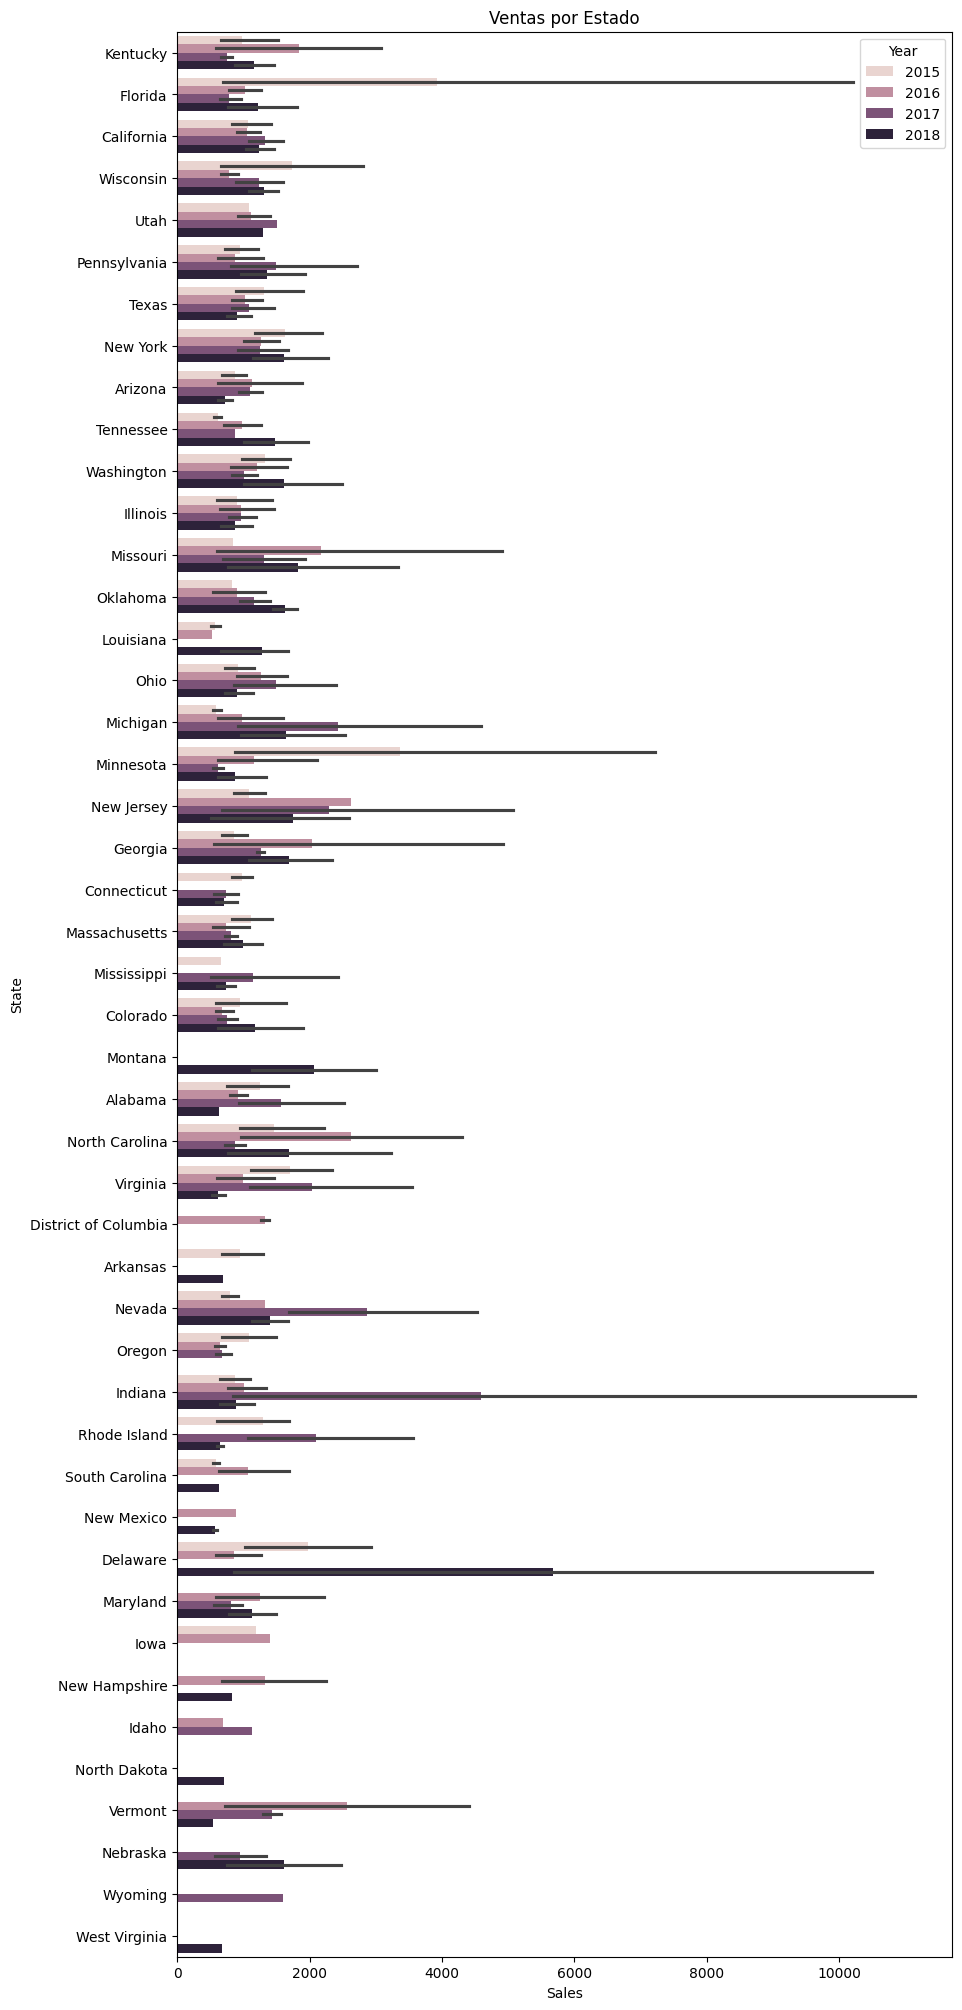

In [32]:
plt.figure(figsize=(10,25))
sns.barplot(data=sales_outliers, x= 'Sales', y ='State', hue='Year');
plt.title('Ventas por Estado');

Con este gráfico podemos ver que los estados donde hay una mayor diferencia en cuanto a las ventas, son Delaware en 2018, Indiana en el 2017 y Florida en el 2015. Podemos deducir que en esos años, en estos estados hubieron ventas altas fuera de lo normal. En el resto, los datos siguen cierto patrón igualitario.

C:\Users\sguti\AppData\Local\Temp\ipykernel_17736\1703244130.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_outliers, x='Month', y='Sales', hue='Year', ci=None)


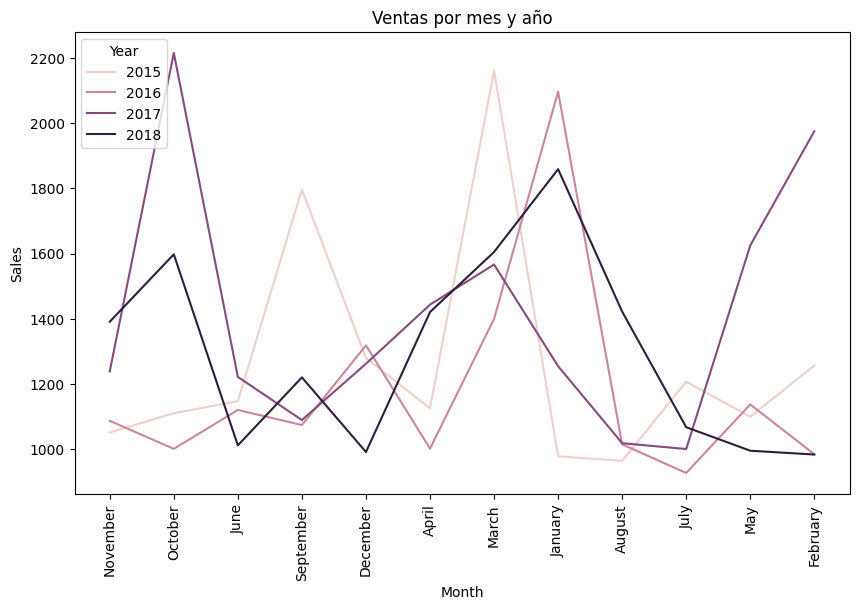

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_outliers, x='Month', y='Sales', hue='Year', ci=None)
plt.xticks(rotation=90)
plt.title('Ventas por mes y año');

Vemos datos sesgados en los meses de Octubre, Septiembre, Enero y Febrero, sobre todo entre años. Por tanto seguimos sin ver ningún patrón.

Comprobamos si hay un hay algún patrón de comportamiento en cuanto a la hipótesis de: ¿Los clientes que más gasto realizan son los que invierten en un envio más rápido?

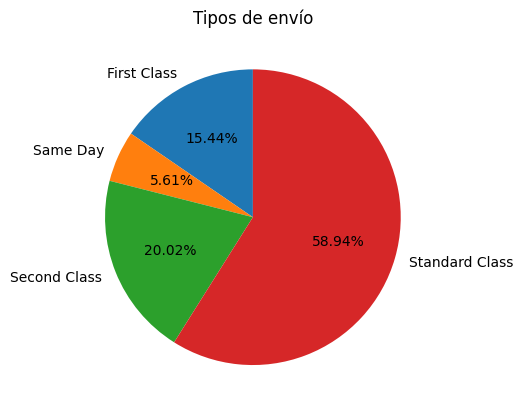

In [34]:
Tipos_envio = sales_outliers.groupby('Ship Mode')['Sales'].sum()
plt.pie(Tipos_envio,
        labels=Tipos_envio.index,
        autopct='%1.2f%%',
        startangle=90)
plt.title('Tipos de envío');

Esto nos indica que no porque las ventas sean más altas, los clientes pagan un envío de mayor precio.

### Creamos un dataset sin los outliers para seguir con las comprobaciones:

Vamos a ver si dentro del grupo de los normalizados hay outliers:

count    8655.000000
mean       93.213330
std       114.693292
min         0.444000
25%        15.014000
50%        40.880000
75%       124.382000
max       500.240000
Name: Sales, dtype: float64


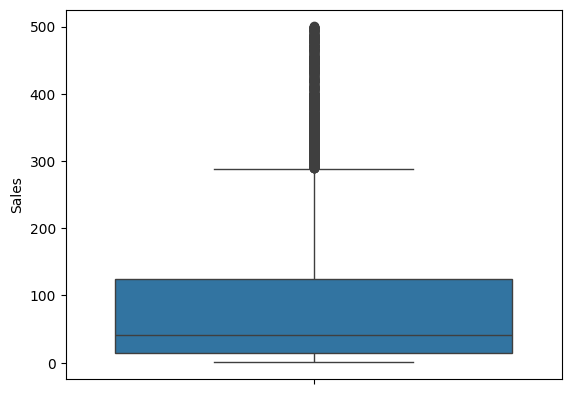

In [35]:
sales_sin_outliers =  sales[sales['Sales'] <= 500.64]

print(sales_sin_outliers['Sales'].describe())

sns.boxplot(data = sales_sin_outliers, y = 'Sales');

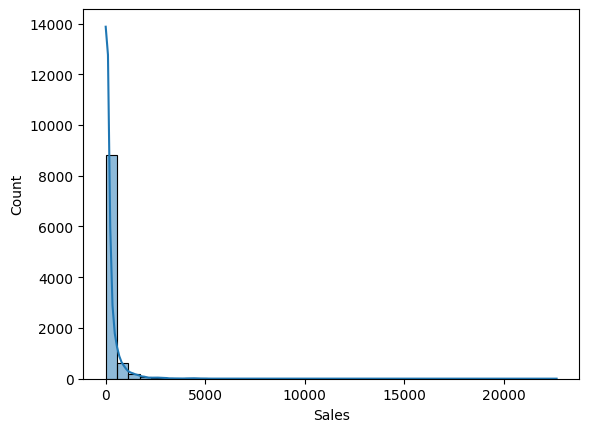

In [37]:
sns.histplot(data=sales['Sales'],bins=40, kde=True);

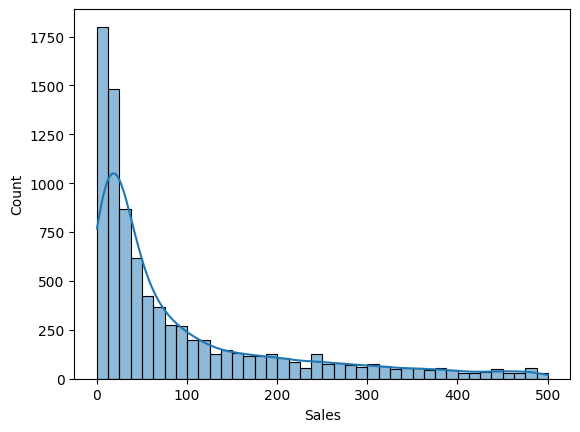

In [36]:
sns.histplot(data=sales_sin_outliers['Sales'],bins=40, kde=True);

Hacemos una primera comprobación de la pregunta principal: ¿Las ventas han ido aumentando con los años?

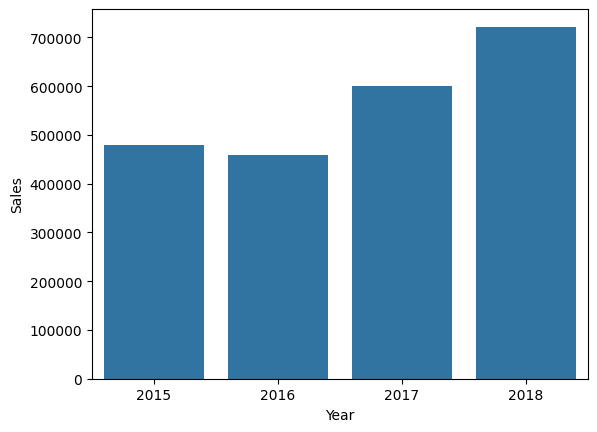

In [38]:
ventas_por_año = sales.groupby('Year')['Sales'].sum().reset_index()
sns.barplot(data=ventas_por_año, x='Year', y ='Sales');

## Analysis & Modeling
 Análisis y Modelado

**RESUMEN DEL PROCESO HASTA AHORA:**

Encontramos un dataset en Kaggle y decidimos bajarlo a través de su API.

Después de hacer las primeras comprobaciones, vemos que el dataset está bastante limpio. Sólo hemos tenido que cambiar el tipo de las variables timestamp y el código postal. Decidimos agregar dos nuevas columnas: una con el mes y otra con el año, basadas en la variable de la fecha de pedido. Esto nos va a facilitar las exploraciones relacionadas con lo temporal.

No había prácticamente nulos en la base de datos y han sido fácilmente tratados, dado que era un código postal que faltaba.
En cambio, si que hay una gran parte de outliers. Después de explorar para ver si estos outliers seguían algún patrón. Comprobar que no, y ver que también dentro de los datos normales hay parte de outliers. **Decidimos trabajar con ellos**. En nuestro caso son datos reales, además de ser la variable más importante en cuanto a beneficio económico de la empresa porque son las ventas generadas, por lo tanto, no los podemos ignorar.

A pesar de ello, para lanzar las previsiones con Machine Learning si que tendremos que tratar a esos outliers, necesario para conseguir una mayor precisión de los modelos. Esto lo haremos a través de una winsorización, como veremos más adelante.

NOTA*: Durante todo el curso hemos tenido problemas en cuanto a la conexión de Power BI, por tanto, vamos a descargar nuestra base de datos y/o dataframes que vayamos creando en un archivo CSV que luego importaremos en Power BI.

In [39]:
sales.to_csv('sales_clean.csv', index=False)

## Winsorizado

Decidimos tratar los outliers con un Winsorizado, esto hará que no eliminemos ningún dato, pero que no estén tan sesgados

Defaulting to user installation because normal site-packages is not writeable


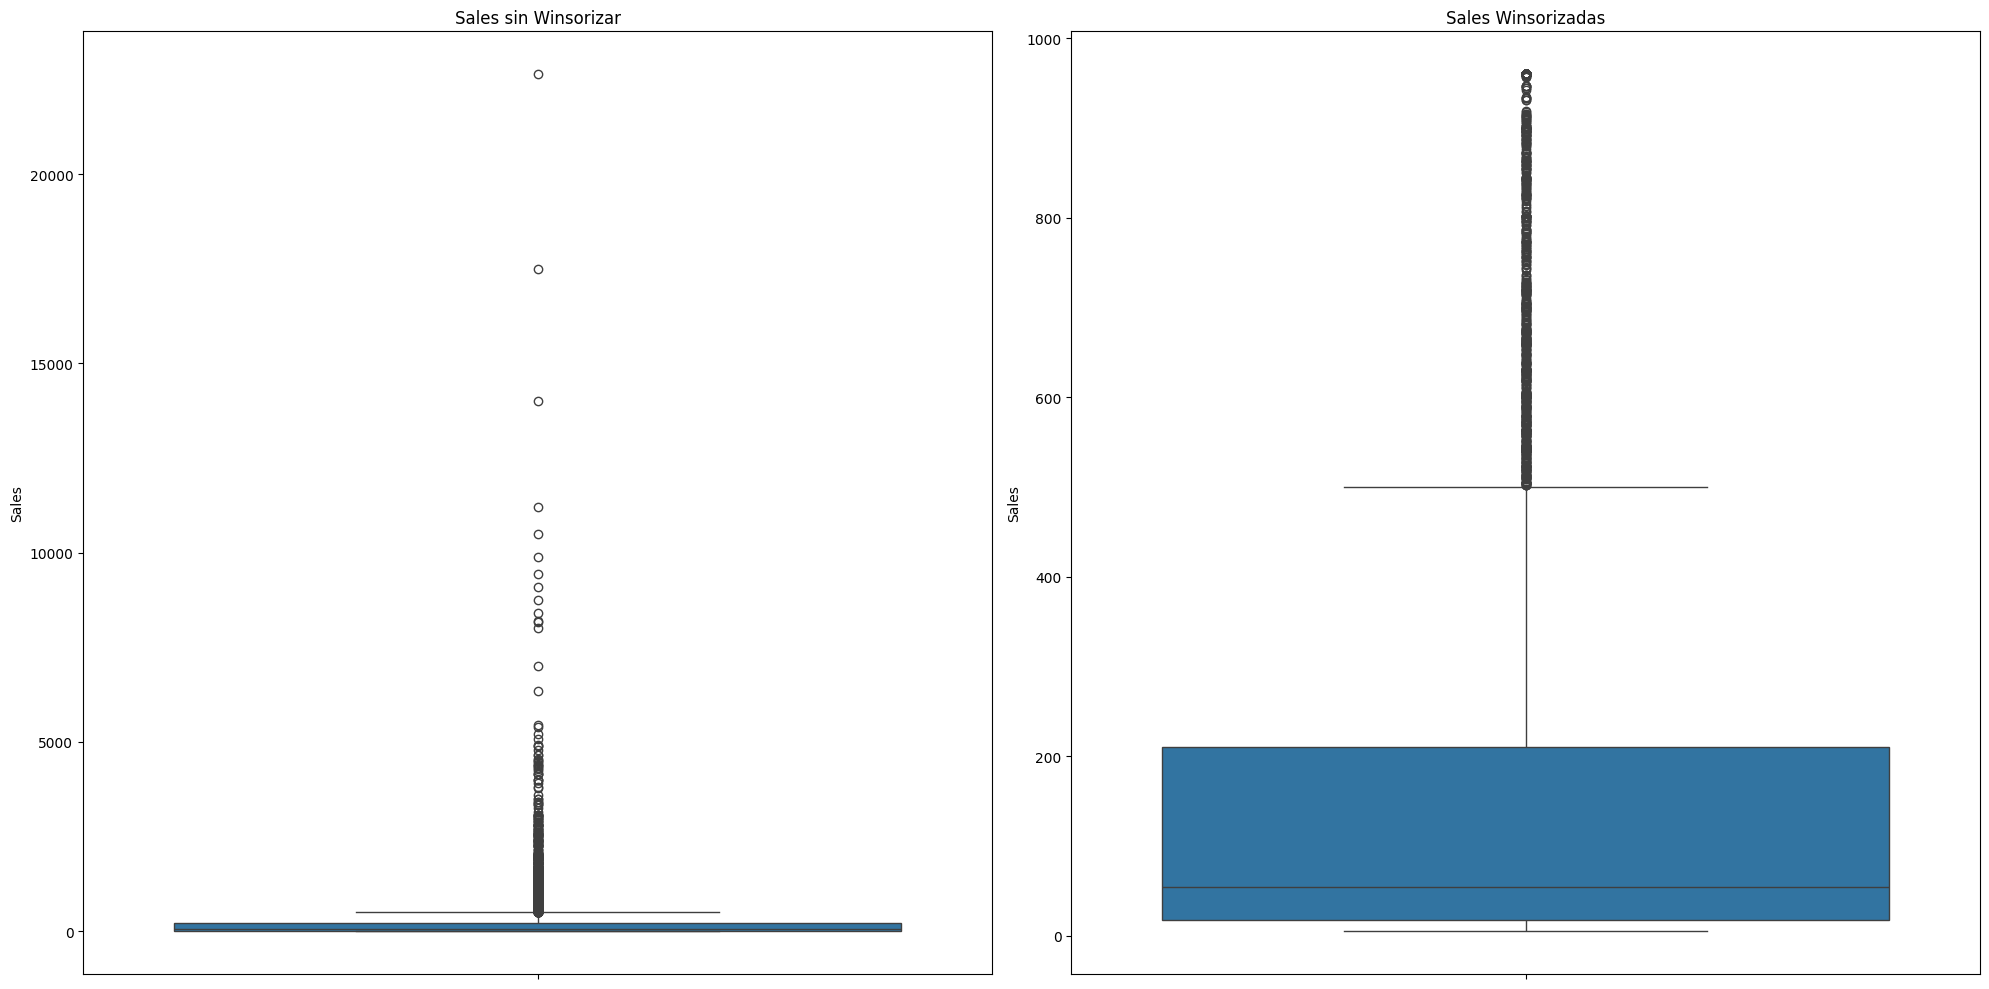

In [ ]:
#Hacemos una copia del dataset primero:

copia_sales = sales.copy()

#Ahora Winsorizamos:

!pip install scipy

from scipy.stats.mstats import winsorize

# Winsorizamos Sales al 5% inferior y superior
copia_sales['Sales'] = winsorize(copia_sales['Sales'], limits=[0.05, 0.05])

#Hacemos las pruebas de los gráficos:

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

sns.boxplot(data = sales, y = 'Sales', ax = axes[0])
sns.boxplot(data = copia_sales, y = 'Sales', ax = axes[1])

axes[0].set_title('Sales sin Winsorizar')
axes[1].set_title('Sales Winsorizadas')

plt.tight_layout();
#Hacer un comentario o cambir el nombre a 'puro' para el df original


In [41]:
copia_sales['Sales'].describe()

C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    9800.000000
mean      176.316263
std       258.695565
min         4.960000
25%        17.248000
50%        54.490000
75%       210.605000
max       959.984000
Name: Sales, dtype: float64

In [42]:
print(copia_sales.info())
copia_sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2015,June
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,2015,June
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,June
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,2015,June
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,2015,June


Comprobamos que no hay tanto sesgo entre las variables. Aunque siguen habiendo ouliers. 

----------------------------------------------------------------------------------------------------------------------------------------------------------

## Modelos predictivos

Nos quedaremos solamente en el **aprendizaje supervisado** de Machine Learning y probaremos con los modelos de **regresión lineal** y **regresión logística**.

In [43]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report


Probamos de hacer una predicción de las ventas, basado en el año y el mes:

In [45]:

sales_predicciones = copia_sales[['Month', 'Year', 'Sales']]

#Pasamos los meses a str a numéricos:
numeros_meses = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

sales_predicciones['Month'] = sales_predicciones['Month'].map(numeros_meses)

X = sales_predicciones[['Month', 'Year']] #nuestras variables 
y = sales_predicciones['Sales'] #la predicción

#Dividimos entre entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creamos el modelo y lo entrenamos:
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\sguti\AppData\Local\Temp\ipykernel_17736\3079122608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_predicciones['Month'] = sales_predicciones['Month'].map(numeros_meses)


LinearRegression()

In [46]:

#Probamos la predicción para el 2019:
pred_years = [2019]
pred_months = list(range(1, 13))  #Que nos cree los números para los meses

pred_df = pd.DataFrame([(month, year) for year in pred_years for month in pred_months], columns=['Month', 'Year'])

predictions = model.predict(pred_df)

#Añadimos las predicciones:
pred_df['Predicted Sales'] = predictions

#Comprobamos los resultados:
ventas_reales = sales_predicciones.groupby('Year')['Sales'].sum().reset_index()
ventas_predichas = pred_df.groupby('Year')['Predicted Sales'].sum().reset_index()
print(ventas_reales)
print(ventas_predichas)


   Year        Sales
0  2015  354108.5921
1  2016  372897.2024
2  2017  448276.5274
3  2018  552617.0552
   Year  Predicted Sales
0  2019      2022.395636


La diferencia que nos sale entre las predicciones y las ventas reales es muy grande. Nuestro modelo tiene una precisión excesivamente baja.

Vamos a probar de hacer lo mismo pero con el dataset que creamos anteriormente sin los outliers:

In [57]:

sales_predicciones2 = sales_sin_outliers[['Month', 'Year', 'Sales']]

numeros_meses = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

sales_predicciones2['Month'] = sales_predicciones2['Month'].map(numeros_meses)

X = sales_predicciones2[['Month', 'Year']] 
y = sales_predicciones2['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

#Volvemos a probar para el 2019:
pred_years = [2019]
pred_months = list(range(1, 13)) 

pred_df2 = pd.DataFrame([(month, year) for year in pred_years for month in pred_months], columns=['Month', 'Year'])

predictions = model.predict(pred_df2)

pred_df2['Predicted Sales'] = predictions

ventas_reales = sales_predicciones2.groupby('Year')['Sales'].sum().reset_index()
ventas_predichas = pred_df2.groupby('Year')['Predicted Sales'].sum().reset_index()
print(ventas_reales)
print(ventas_predichas)



   Year        Sales
0  2015  155727.6401
1  2016  169491.8460
2  2017  211845.7333
3  2018  269696.1504
   Year  Predicted Sales
0  2019      1145.550154


C:\Users\sguti\AppData\Local\Temp\ipykernel_17736\2291469244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_predicciones2['Month'] = sales_predicciones2['Month'].map(numeros_meses)


Aunque hay menos diferencia entre las ventas reales y las predichas que el en el modelo anterior, los resultados de las predichas siguen siendo excesivamente dispares.
En principio trabajar sin los outliers, en este caso no nos indica mejor precisión.

Probamos añadiendo más variables a nuestro modelo, y esta vez testearemos su prrecisión con Error Medio Cuadrático (MSE) y el coheficiente de determinación(R2):

In [59]:
X = copia_sales[['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']] #Nuestras varibles 
y = copia_sales['Sales'] #Nuestra predicción

#Pasamos las variables categóricas a numéricas con OneHotEncoder:
preprocesamiento = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region'])],
    remainder='passthrough')

X = preprocesamiento.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Hacemos la predicción:
y_prediccion = modelo.predict(X_test)

#Esta vez avaluamos el modelo con mean_squared_error y r2_score:
mse = mean_squared_error(y_test, y_prediccion)
print(f'Error medio cuadrático (MSE): {mse}')
r2 = r2_score(y_test, y_prediccion)
print(f'Coeficiente de determinación (R²): {r2}')

Error medio cuadrático (MSE): 49377.48930796979
Coeficiente de determinación (R²): 0.3527676802307026


El error medio cuadrático a menor sea, indica una mayor precisión, en cambio el coeficiente de determinación a mayor sea (esté más cerca del 1) indica que hay una mayor precisión con el modelo. 

En cuanto al R2 significa la diferencia que hay entre el valor observado y el valor predicho. Nuestro resultado dice que con las variables que le hemos aportado, el modelo explica el 35% de variación, mientras que hay un 65% que se queda fuera. El MSE que hemos obtenido es muy elevado, por lo que indica que hay una diferencia muy grande entre el valor real y la linea de regresión.

Cambiamos las variables y añadimos esta vez el año y el mes:

In [ ]:
X = copia_sales[['Ship Mode', 'Segment', 'Category', 'Region', 'Year', 'Month']] #Nuestras varibles 
y = copia_sales['Sales'] #Nuestra predicción

#Pasamos las variables categóricas a numéricas con OneHotEncoder:
preprocesamiento = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Ship Mode', 'Segment', 'Category', 'Region', 'Year', 'Month'])],
    remainder='passthrough')

X = preprocesamiento.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Hacemos la predicción:
y_prediccion = modelo.predict(X_test)

#Esta vez evaluamos el modelo con mean_squared_error y r2_score:
mse = mean_squared_error(y_test, y_prediccion)
print(f'Error medio cuadrático (MSE): {mse}')
r2 = r2_score(y_test, y_prediccion)
print(f'Coeficiente de determinación (R²): {r2}')

Error medio cuadrático (MSE): 66145.71688879425
Coeficiente de determinación (R²): 0.13297240534610433


En este caso la precisión del modelo es incluso menor, porque el MSE a aumentado y R2 a disminuido.
En este caso hay un 86% de la muestra predicha que se que se escapa.

Trabajando con estas variables, el modelo presenta todavía una peor predicción.

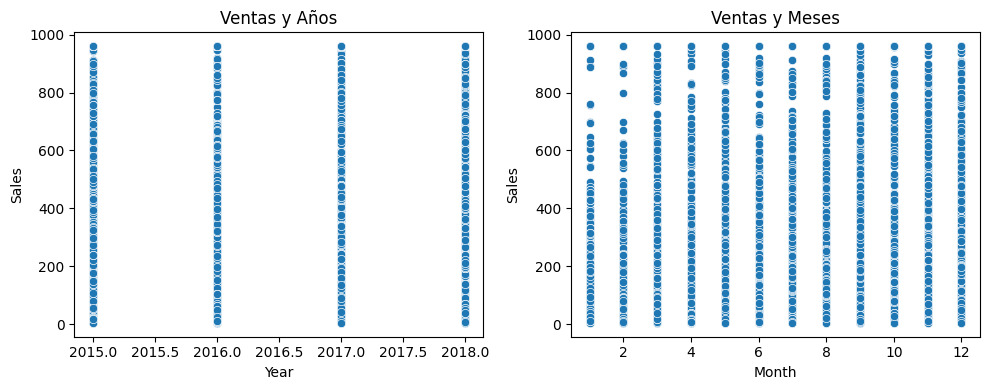

In [76]:
copia_sales['Year'] = copia_sales['Order Date'].dt.year
copia_sales['Month'] = copia_sales['Order Date'].dt.month

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))  

sns.scatterplot(ax=axes[0],data =copia_sales,x='Year',y='Sales')
axes[0].set_title('Ventas y Años')
axes[0].tick_params(axis='x')

sns.scatterplot(ax=axes[1],data=copia_sales, x='Month',y='Sales')
axes[1].set_title('Ventas y Meses')
axes[0].tick_params(axis='x')

plt.tight_layout()
plt.show()

**PRINCIPAL ERROR QUE HEMOS COMETIDO:**

No es posible aplicar una relación lineal entre variables que no tienen una relación lineal.
Las relaciones lineales tienen que ver con las variables continuas, las relaciones que hay entre dos variables continuas, como por ejemplo las Ventas.
La única variable continua en nuestro dataset es 'Sales', el resto son variables categóricas, no podemos establecer una relación lineal entre ambas, dicho de otra manera:
Que aumente una categoría no hace que aumenten las ventas. Las variables categóricas no aumentan, simplemente clasifican.

Quedan descartados los modelos de regresión lineal.

## Probamos hacer una predicción de los tipos de envío con una regresión logística:

In [62]:
copia_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [63]:

X = copia_sales[['Sales', 'Category']] #Variables que van a predecir
y = copia_sales['Ship Mode'] #Variable a predecir

#Codificamos la variable categórica
preprocesamiento = ColumnTransformer( 
    transformers=[('cat', OneHotEncoder(), ['Category'])],
    remainder='passthrough' ) 

X_final = preprocesamiento.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

#creamos el modelo:
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train, y_train)

#Hacemos las predicciones
y_pred = modelo_logistico.predict(X_test)

#Evaluamos el modelo:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.6005102040816327
Informe de clasificación:
                precision    recall  f1-score   support

   First Class       0.00      0.00      0.00       302
      Same Day       0.00      0.00      0.00       112
  Second Class       0.00      0.00      0.00       369
Standard Class       0.60      1.00      0.75      1177

      accuracy                           0.60      1960
     macro avg       0.15      0.25      0.19      1960
  weighted avg       0.36      0.60      0.45      1960



C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Interpretaciones: 

Sabemos que el modelo fucniona bien para el tipo de envío de Standar Class, tiene una precisión del 60%.
Pero en cambio el resto de los tipos de envío no los predice, 
seguramente porque la muestra que tiene del resto son mucho menores que las de Standar Class (1177, y el resto de los envíos son de 369, 112 y 302)
En general el modelo tiene una predicción del 60%, pero de tan solo uno de los tipos de envío.

Vamos a ver la relación entre sales y categorías:

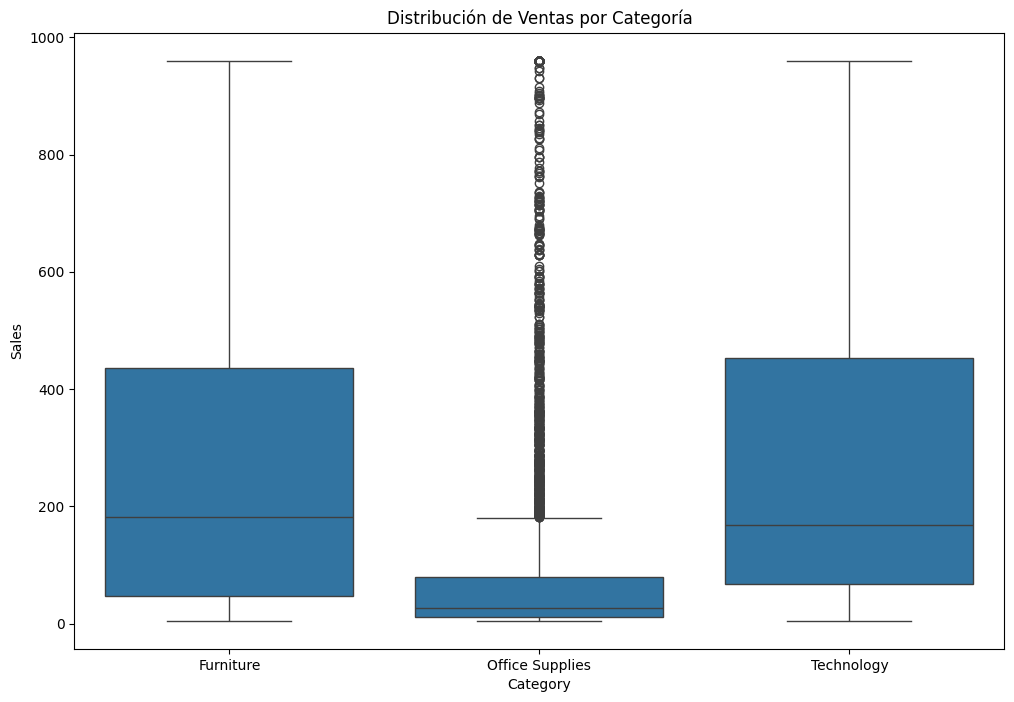

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8)) 
sns.boxplot(x='Category', y='Sales', data=copia_sales) 
plt.title('Distribución de Ventas por Categoría');

Hay una segmentación en la distribución de ventas en la categoría de Office Supplies Category.
Vamos a intentar eliminar estos outliers para ver si mejora nuestro modelo.

In [65]:
#Cogemos solo office_supplies:
df_office_supplies = copia_sales[copia_sales['Category'] == 'Office Supplies']

#Calculamos los outliers
Q1 = df_office_supplies['Sales'].quantile(0.25)
Q3 = df_office_supplies['Sales'].quantile(0.75)
IQR = Q3 - Q1

valor_más_bajo = Q1 - 1.5 * IQR
valor_más_alto = Q3 + 1.5 * IQR

# Crear un filtro para los outliers
filtro = (df_office_supplies['Sales'] >= valor_más_bajo) & (df_office_supplies['Sales'] <= valor_más_alto)

df_office_supplies_sin_outliers = df_office_supplies[filtro]

#Juntamos el resultado con el resto del dataset
copia_sales_limpia = pd.concat([copia_sales[copia_sales['Category'] != 'Office Supplies'], df_office_supplies_sin_outliers])

# Verificar el resultado
print(copia_sales_limpia.info())
print(copia_sales_limpia.shape[0])


<class 'pandas.core.frame.DataFrame'>
Index: 8995 entries, 0 to 9796
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8995 non-null   int64         
 1   Order ID       8995 non-null   object        
 2   Order Date     8995 non-null   datetime64[ns]
 3   Ship Date      8995 non-null   datetime64[ns]
 4   Ship Mode      8995 non-null   object        
 5   Customer ID    8995 non-null   object        
 6   Customer Name  8995 non-null   object        
 7   Segment        8995 non-null   object        
 8   Country        8995 non-null   object        
 9   City           8995 non-null   object        
 10  State          8995 non-null   object        
 11  Postal Code    8995 non-null   object        
 12  Region         8995 non-null   object        
 13  Product ID     8995 non-null   object        
 14  Category       8995 non-null   object        
 15  Sub-Category   8995 non-nu

In [66]:
#Hacmos el mismo proceso sin los outliers de la categoría del office-supplies:
X = copia_sales_limpia[['Sales', 'Category']]
y = copia_sales_limpia['Ship Mode']

preprocesamiento = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Category'])],
    remainder='passthrough')

X_final = preprocesamiento.fit_transform(X)

#Dividimos:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

#Modelo:
modelo_logistico = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo_logistico.fit(X_train, y_train)

#Predicción:
y_pred = modelo_logistico.predict(X_test)

#Evaluación:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.37854363535297386
Informe de clasificación:
                precision    recall  f1-score   support

   First Class       0.00      0.00      0.00       287
      Same Day       0.05      0.23      0.08       110
  Second Class       0.20      0.16      0.18       345
Standard Class       0.59      0.57      0.58      1057

      accuracy                           0.38      1799
     macro avg       0.21      0.24      0.21      1799
  weighted avg       0.39      0.38      0.38      1799



C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Aunque la precisión del modelo ha disminuido, ahora tiene una precisión del 37%, en lugar del 60% del modelo anterior. Podemos ver como este modelo predice más categorías de envío que el anterior. En concreto predice un 5% del tipo de envío de Same Class, un 20% del Second Class y un 59% del Standard Class. Este último, por tanto, tiene prácticamente la misma precisión que el modelo anterior. 

Por tanto, decidimos quedarnos con este último. Perdemos en precisión general, pero es debido a que está trabajando para predecir el resto de las categorías, y dado que la precisión de la única categoría que predecía el modelo anterior, es la misma que esta, ganamos en este aspecto.

Decidimos presentar los resultados de estas predicciones, algo que continuamos en Power BI.


In [67]:
#Creamos un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    'Actual Ship Mode': y_test.reset_index(drop=True),  # Valores reales de Ship Mode
    'Predicted Ship Mode': y_pred}) #Predicciones del modelo

#Añadimos las columnas originales de 'Category' y 'Sales' desde el conjunto de prueba
original_test_data = copia_sales_limpia.loc[y_test.index, ['Category', 'Sales']].reset_index(drop=True)

#Combinamos los datos originales con las predicciones
df_prediciones_envios = pd.concat([original_test_data, predictions_df], axis=1)


df_prediciones_envios.info()
print(df_prediciones_envios.head())

#Lo exportamos a CSV para pasarlo a Power BI:
df_prediciones_envios.to_csv('df_predicciones_envios.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             1799 non-null   object 
 1   Sales                1799 non-null   float64
 2   Actual Ship Mode     1799 non-null   object 
 3   Predicted Ship Mode  1799 non-null   object 
dtypes: float64(1), object(3)
memory usage: 56.3+ KB
          Category    Sales Actual Ship Mode Predicted Ship Mode
0  Office Supplies    9.552      First Class      Standard Class
1        Furniture    4.960   Standard Class            Same Day
2  Office Supplies    5.607   Standard Class      Standard Class
3       Technology   36.792         Same Day        Second Class
4        Furniture  359.058   Standard Class            Same Day
